In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
X_train = np.linspace(1,100,num=100,dtype=np.int32)
y_train = X_train * 3

In [9]:
X_train = X_train.reshape(X_train.shape[0],1)

In [10]:
print("Shape of Train Details :\n==========================")
print("Shape of X_train %s"%str(X_train.shape))
print("Shape of y_train %s"%str(y_train.shape))

Shape of Train Details :
Shape of X_train (100, 1)
Shape of y_train (100,)


In [48]:
X_train = np.insert(X_train,0,0,axis=1)

In [11]:
def hypothesis(X,theta):
    return np.dot(X,theta)

In [129]:
def costfunction(X,y,theta):
    m = X.shape[0]
    
    return (1/(2*m)) * np.dot((hypothesis(X,theta) - y).T , (hypothesis(X,theta) - y))

In [109]:
#a = costfunction(X_train,y_train.reshape(y_train.shape[0],1),np.array([[0],[3]]))

In [110]:
#a.shape

In [101]:
def update_parameter(X,y,theta,alpha=0.005,print_details=False):
    m = X.shape[0]
    theta -= alpha * (1 / m) * np.dot((hypothesis(X,theta)-y).T , X).T
    return theta

In [130]:
def LinearModel(X,y,alpha=0.0005,iteration=1000,print_details=False):
    theta = np.zeros((X.shape[1],1))
    costFunc = []
    for _ in range(iteration):
        costFunc.append((costfunction(X,y,theta)))
        theta = update_parameter(X,y,theta,alpha=alpha)
    costFunc.append(costfunction(X,y,theta)[0][0])
    return theta,costFunc

In [143]:
theta,cost = LinearModel(X_train,y_train.reshape(100,1),iteration=70)

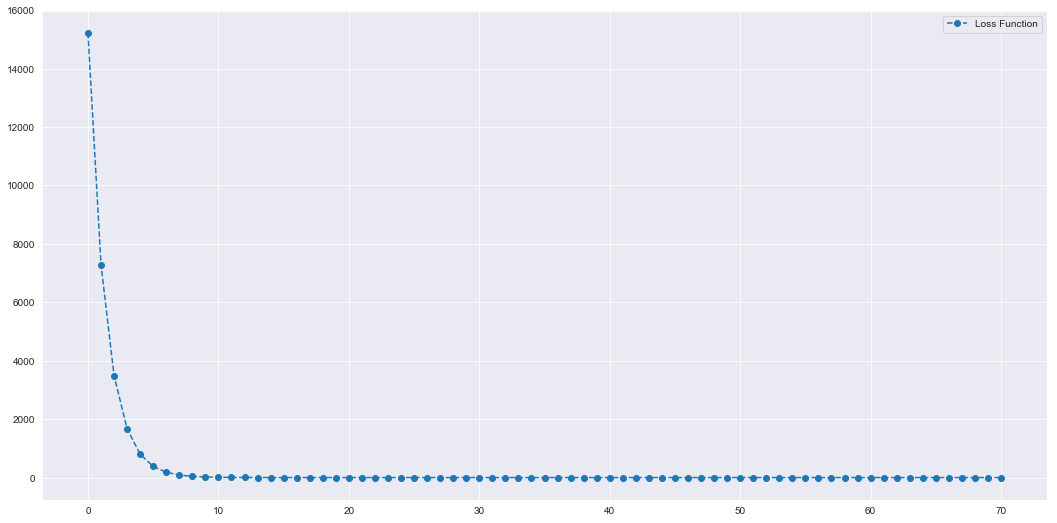

In [148]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,9))
plt.plot(cost,'o--',label="Loss Function")
plt.legend()

In [161]:
def MAE(X,y,theta):
    print("Value of theta is : \n%s"%str(theta))
    hypo = hypothesis(X,theta)
    return np.mean(np.abs(hypo-y))

In [169]:
X_test = np.linspace(300,400,num=150)
X_test = X_test.reshape(X_test.shape[0],1)
y_test = (X_test * 3)
y_test = y_test.reshape(y_test.shape[0],1)

X_test = np.insert(X_test,0,0,axis=1)

In [170]:
print("Shape of Test Details :\n==========================")
print("Shape of X_test %s"%str(X_test.shape))
print("Shape of y_test %s"%str(y_test.shape))

Shape of Test Details :
Shape of X_test (150, 2)
Shape of y_test (150, 1)


In [171]:
mae = MAE(X_test,y_test,theta)
print("\nMean absolute error is : %s"%str(mae))
print("RMSE is : %s"%(str(costfunction(X_test,y_test,theta)[0,0])))

Value of theta is : 
[[0.]
 [3.]]

Mean absolute error is : 6.571007512926978e-09
RMSE is : 2.1737901187363648e-17
